In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.

plt.style.use("ggplot")  #using style ggplot
#%matplotlib inline
#import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# Extracting The Data

In [2]:
df = pd.read_csv('heart.csv')

# Analysis

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

### We have 303 rows and 14 coumns

In [5]:
df.describe().style.background_gradient(cmap = 'hot')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#df.groupby('chol')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<Axes: title={'center': 'Male & Female have heart attack'}, ylabel='output'>

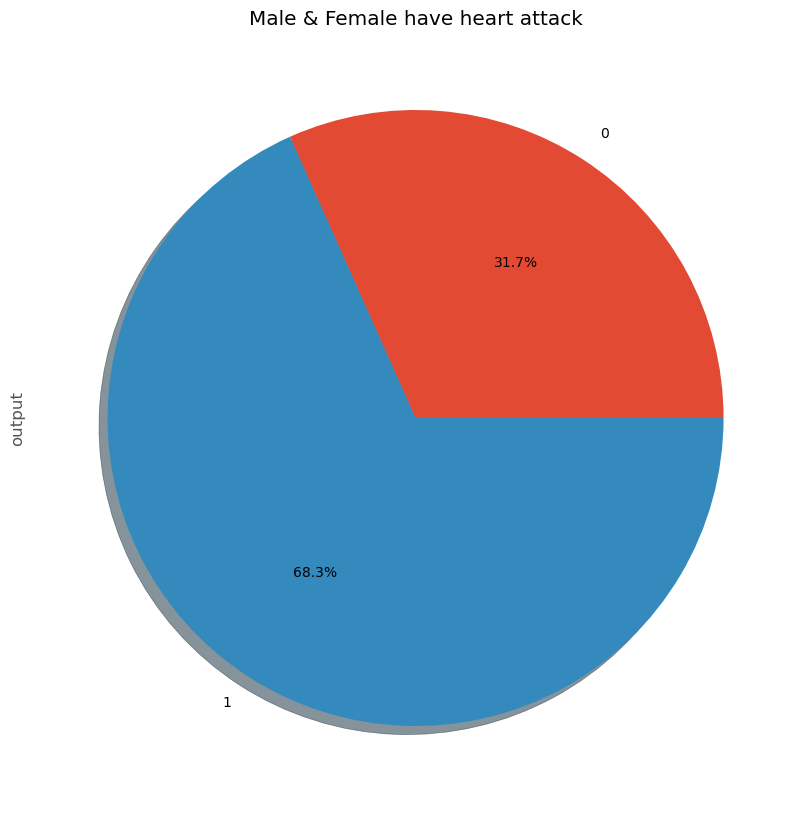

In [10]:
df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

### Gender Of Patient

#### MALE : 0 
#### FEMALE : 1

<Axes: title={'center': 'fasting blood sugar'}, ylabel='output'>

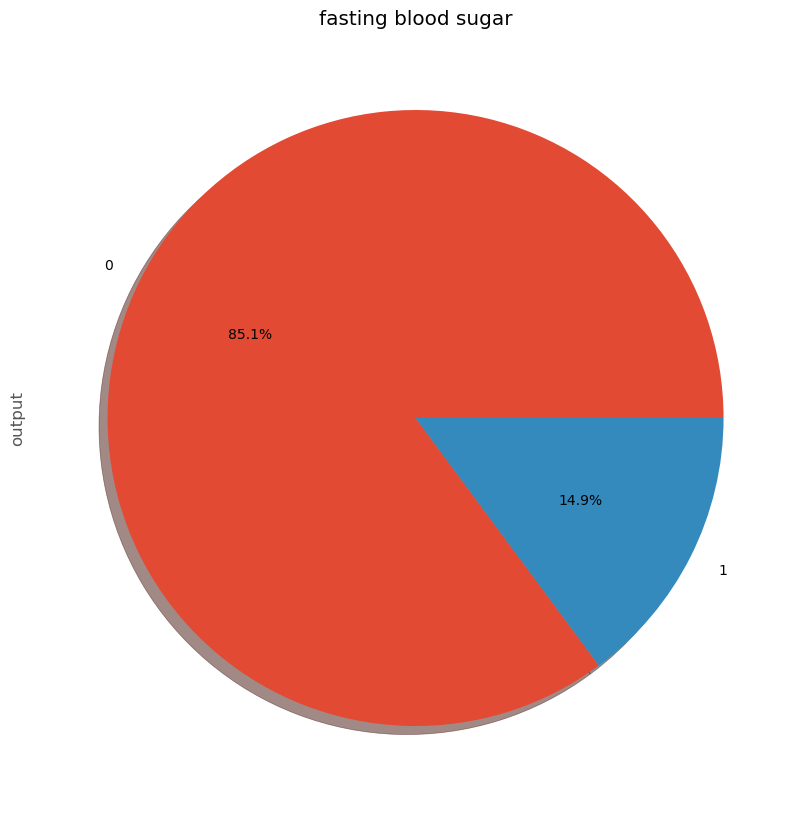

In [11]:
df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

###### Approximately 15% of people are having fasting blood sugar greater than 120mg/dl   

<Axes: xlabel='age', ylabel='chol'>

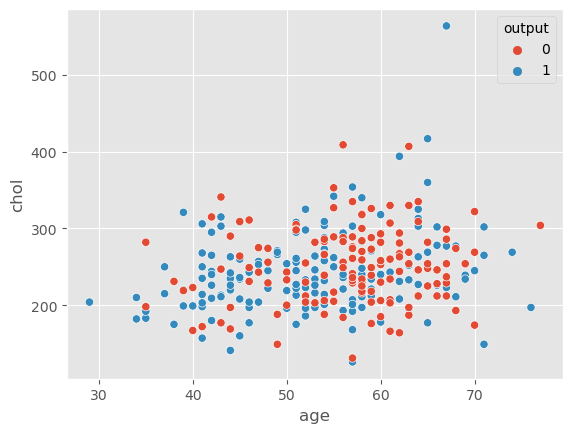

In [12]:
sns.scatterplot(x="age",y="chol",data=df,hue="output")

In [13]:
#numeric_var = ["age", "trtbps", "chol", "oldpeak"]
#graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
#graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
#plt.show()

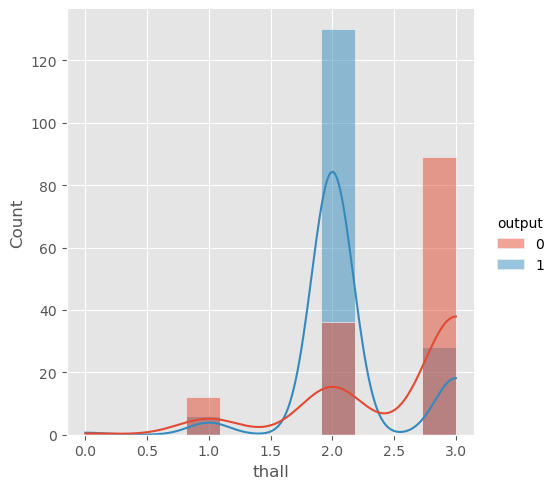

In [14]:
sns.displot(x = "thall", data=df, hue="output",kde=True)#Thall:maximum heart rate achieved 

### whose patients whose have 2nd type thall have high chances  of Heart Attack

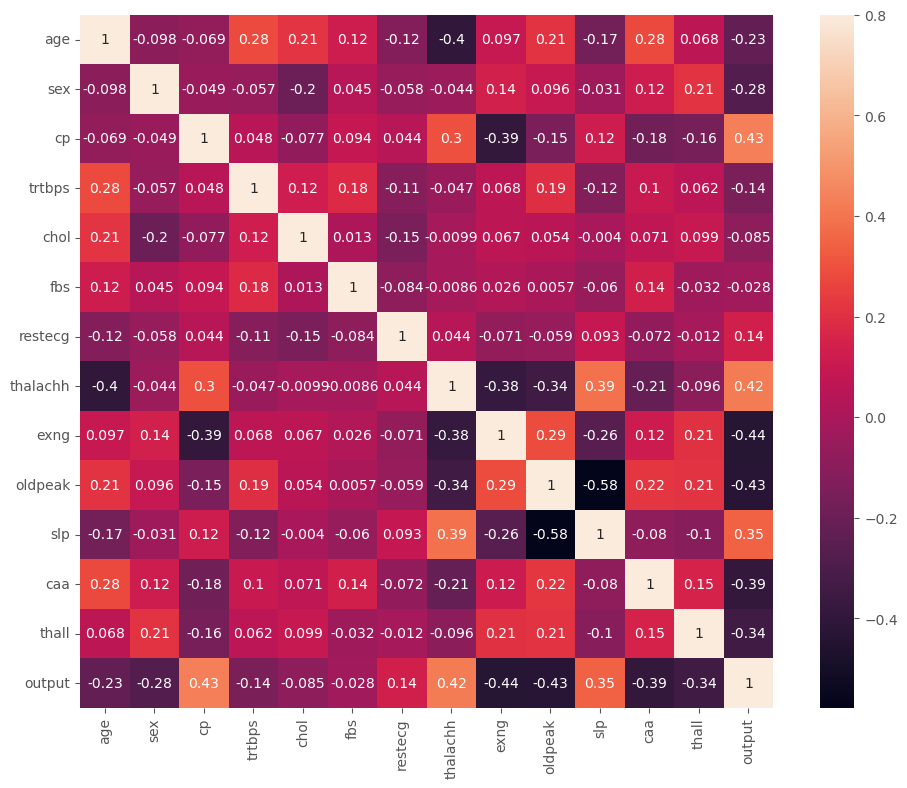

In [15]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

### OldPeak(ST depression induced by exercise relative to rest) and thall ( Thalassemia ) have the most correlation with target ( diagnosis of heart disease)

# PreProcessing

In [16]:
X = df.iloc[: , 0:-1 ]
Y = df['output']


# X_train, X_testing, y_train, y_test = train_test_split(X, Y, test_size = 0.25 ,random_state=8)
X_trainc, X_testc, y_train, y_test = train_test_split(X, Y, test_size = 0.25 ,random_state=8)
sc = StandardScaler()
X_test = sc.fit_transform(X_testc)
X_train = sc.transform(X_trainc)

# Implementing Classsifer

## KNN


In [17]:
myKNN = KNeighborsClassifier(n_neighbors = 1)
model = myKNN.fit(X_train, y_train)
y_predict = myKNN.predict(X_test)

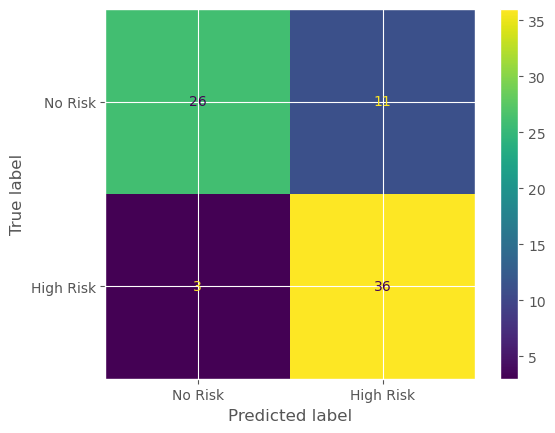

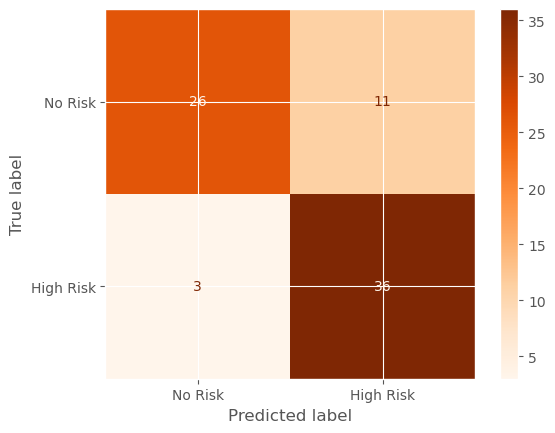

In [18]:
#print(confusion_matrix(y_test,y_predict))
cm = confusion_matrix(y_predict,y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['No Risk','High Risk']).plot()
disp.plot(include_values=True, cmap='Oranges', xticks_rotation='horizontal')
plt.show()

In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.92      0.77      0.84        47

    accuracy                           0.82        76
   macro avg       0.81      0.83      0.81        76
weighted avg       0.84      0.82      0.82        76



## Decision Tree

In [20]:
dtree = DecisionTreeClassifier()
model=dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

In [21]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.82      0.70      0.76        47

    accuracy                           0.72        76
   macro avg       0.72      0.73      0.72        76
weighted avg       0.74      0.72      0.73        76



In [22]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.82      0.70      0.76        47

    accuracy                           0.72        76
   macro avg       0.72      0.73      0.72        76
weighted avg       0.74      0.72      0.73        76



## Random Forest

In [23]:
rforest = RandomForestClassifier(n_estimators = 300)
rforest.fit(X_train, y_train)
y_predict2 = rforest.predict(X_test)


In [24]:
print(confusion_matrix(y_test,y_predict2))

[[26  3]
 [10 37]]


In [25]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.93      0.79      0.85        47

    accuracy                           0.83        76
   macro avg       0.82      0.84      0.83        76
weighted avg       0.85      0.83      0.83        76



## Naive Bayes

In [26]:
model = GaussianNB()
model.fit(X_test,y_test)
y_predict3 = model.predict(X_test)


In [27]:
print(confusion_matrix(y_test, y_predict3))

[[25  4]
 [ 4 43]]


In [28]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.91      0.91      0.91        47

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



## Logistic Regression

In [29]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [30]:
print(confusion_matrix(y_test, predictions))

[[26  3]
 [ 9 38]]


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.93      0.81      0.86        47

    accuracy                           0.84        76
   macro avg       0.83      0.85      0.84        76
weighted avg       0.86      0.84      0.84        76



## Comparison

In [32]:
LIR= LinearRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
model = GaussianNB()
#LogisticRegression(solver='lbfgs', max_iter=300 )

In [33]:

li = [DTR,RFR,KNR,model]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

DecisionTreeClassifier() : 71.05263157894737
RandomForestClassifier() : 85.52631578947368
KNeighborsClassifier() : 84.21052631578947
GaussianNB() : 81.57894736842105


###  Random forest Classifier() has given the best accuracy result.

### Accuracy vs  Classifier

In [200]:
X_test

array([[-1.22805849,  0.5976143 , -0.83257976, -0.99636481,  1.1511976 ,
        -0.41137668,  0.8785765 ,  1.32124325, -0.76376262,  0.13071719,
        -0.57104762, -0.75026587, -0.43127424],
       [ 1.12936263,  0.5976143 ,  2.04360486,  0.23535067,  0.75256203,
         2.43086217, -1.02918961,  1.02800111, -0.76376262,  0.29492392,
        -0.57104762,  0.15481677, -0.43127424],
       [-0.58512546, -1.67332005, -0.83257976, -0.19307211,  0.50578762,
        -0.41137668,  0.8785765 ,  0.56719203, -0.76376262, -0.85452314,
         0.92549097, -0.75026587, -0.43127424],
       [ 1.02220713,  0.5976143 , -0.83257976, -0.3001778 ,  0.39189174,
        -0.41137668,  0.8785765 , -1.86252855,  1.30930734, -0.69031642,
        -0.57104762,  0.15481677,  1.12952777],
       [-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
        -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
        -0.57104762, -0.75026587,  1.12952777],
       [-0.04934793, -1.673320

In [199]:
predictions[4]

0

In [186]:
X_test

array([[-1.22805849,  0.5976143 , -0.83257976, -0.99636481,  1.1511976 ,
        -0.41137668,  0.8785765 ,  1.32124325, -0.76376262,  0.13071719,
        -0.57104762, -0.75026587, -0.43127424],
       [ 1.12936263,  0.5976143 ,  2.04360486,  0.23535067,  0.75256203,
         2.43086217, -1.02918961,  1.02800111, -0.76376262,  0.29492392,
        -0.57104762,  0.15481677, -0.43127424],
       [-0.58512546, -1.67332005, -0.83257976, -0.19307211,  0.50578762,
        -0.41137668,  0.8785765 ,  0.56719203, -0.76376262, -0.85452314,
         0.92549097, -0.75026587, -0.43127424],
       [ 1.02220713,  0.5976143 , -0.83257976, -0.3001778 ,  0.39189174,
        -0.41137668,  0.8785765 , -1.86252855,  1.30930734, -0.69031642,
        -0.57104762,  0.15481677,  1.12952777],
       [-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
        -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
        -0.57104762, -0.75026587,  1.12952777],
       [-0.04934793, -1.673320

In [250]:
fe2 = [[ 40,  1,  0,110,167, 0 ,  0 ,114 ,1 , 2 ,1 , 0 ,  3]]

In [248]:
sc = StandardScaler()
sc.fit(X_testc)
X_test = sc.transform(X_testc)
X_train = sc.transform(X_trainc)


In [251]:
fet = sc.transform(fe2)

C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [252]:
fet

array([[-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
        -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
        -0.57104762, -0.75026587,  1.12952777]])

In [241]:
X_test[4]

array([-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
       -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
       -0.57104762, -0.75026587,  1.12952777])

In [240]:
fet

array([[ 0.1126422 ],
       [-0.59241451],
       [-0.61049289],
       [ 1.3781286 ],
       [ 2.4085961 ],
       [-0.61049289],
       [-0.61049289],
       [ 1.45044211],
       [-0.59241451],
       [-0.57433614],
       [-0.59241451],
       [-0.61049289],
       [-0.55625776]])

In [224]:
X_test[4]

array([-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
       -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
       -0.57104762, -0.75026587,  1.12952777])

In [225]:
fet

array([[ 0.1126422 ],
       [-0.59241451],
       [-0.61049289],
       [ 1.3781286 ],
       [ 2.4085961 ],
       [-0.61049289],
       [-0.61049289],
       [ 1.45044211],
       [-0.59241451],
       [-0.57433614],
       [-0.59241451],
       [-0.61049289],
       [-0.55625776]])

In [166]:
fe = [ [40] , [ 1],  [ 0],[110],[167] ,  [0] ,[  0] ,[114] ,  [1] ,  [2] ,[1] , [0] ,  [3]]

In [201]:
fe2 = [[ 40,  1,  0,110,167, 0 ,  0 ,114 ,1 , 2 ,1 , 0 ,  3]]

In [202]:
X_testc.iloc[4]

age          40.0
sex           1.0
cp            0.0
trtbps      110.0
chol        167.0
fbs           0.0
restecg       0.0
thalachh    114.0
exng          1.0
oldpeak       2.0
slp           1.0
caa           0.0
thall         3.0
Name: 175, dtype: float64

In [209]:
mu = np.mean(fe)
sigma = np.std(fe)
for x in fe:
    fet1 = (fe-mu)/sigma


In [205]:
X_test[4]

array([-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
       -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
       -0.57104762, -0.75026587,  1.12952777])

In [235]:
fe = pd.DataFrame(fe)

In [236]:
fet2 = sc.fit_transform(fe)

In [237]:
fet2

array([[ 0.1126422 ],
       [-0.59241451],
       [-0.61049289],
       [ 1.3781286 ],
       [ 2.4085961 ],
       [-0.61049289],
       [-0.61049289],
       [ 1.45044211],
       [-0.59241451],
       [-0.57433614],
       [-0.59241451],
       [-0.61049289],
       [-0.55625776]])

In [212]:
X_test[4]

array([-1.54952501,  0.5976143 , -0.83257976, -1.26412905, -1.43044232,
       -0.41137668, -1.02918961, -1.48550295,  1.30930734,  0.78754409,
       -0.57104762, -0.75026587,  1.12952777])

In [162]:
fet

array([[-0.1126422 ,  0.59241451,  0.61049289, -1.3781286 , -2.4085961 ,
         0.61049289,  0.61049289, -1.45044211,  0.59241451,  0.57433614,
         0.59241451,  0.61049289,  0.55625776]])

In [62]:

predictions = KNR.predict(fet)


In [95]:
fet.dtype

dtype('float64')

In [65]:
fet = sc.fit_transform(fe)

In [38]:
X_test = sc.fit_transform(X_testc)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2


In [93]:
X_test.dtype

dtype('float64')

In [ ]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(KNR,pickle_out)
pickle_out.close()